In [1]:
import kagglehub
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("carrie1/ecommerce-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Santo\.cache\kagglehub\datasets\carrie1\ecommerce-data\versions\1


In [2]:
import pandas as pd

# Load the dataset with a different encoding
file_path = 'data.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Check the updated data
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Check for missing values in the dataset
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# Handle missing values
df['Description'].fillna('Unknown', inplace=True)  # Fill missing descriptions with 'Unknown'
df['CustomerID'].fillna(0, inplace=True)  # Fill missing CustomerID with 0

# Remove negative values for Quantity and UnitPrice
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

# Check the dataset after handling missing values and filtering
df.isnull().sum(), df.head()


C:\Users\Santo\AppData\Local\Temp\ipykernel_10736\793841521.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('Unknown', inplace=True)  # Fill missing descriptions with 'Unknown'
C:\Users\Santo\AppData\Local\Temp\ipykernel_10736\793841521.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

(InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 dtype: int64,
   InvoiceNo StockCode                          Description  Quantity  \
 0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
 1    536365     71053                  WHITE METAL LANTERN         6   
 2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
 3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
 4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
 
           InvoiceDate  UnitPrice  CustomerID         Country  
 0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
 1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
 2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
 3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
 4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  )

In [6]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Create TotalPrice column
df['Sales'] = df['Quantity'] * df['UnitPrice']
# GROUPBY CELL – aggregate daily sales
daily_sales = (
df.groupby(df['InvoiceDate'].dt.date)['Sales']
.sum()
.reset_index()
)

In [7]:
# Display the first few rows of the aggregated data
daily_sales.head()


,InvoiceDate,Sales
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-05,31774.95
4,2010-12-06,54830.46


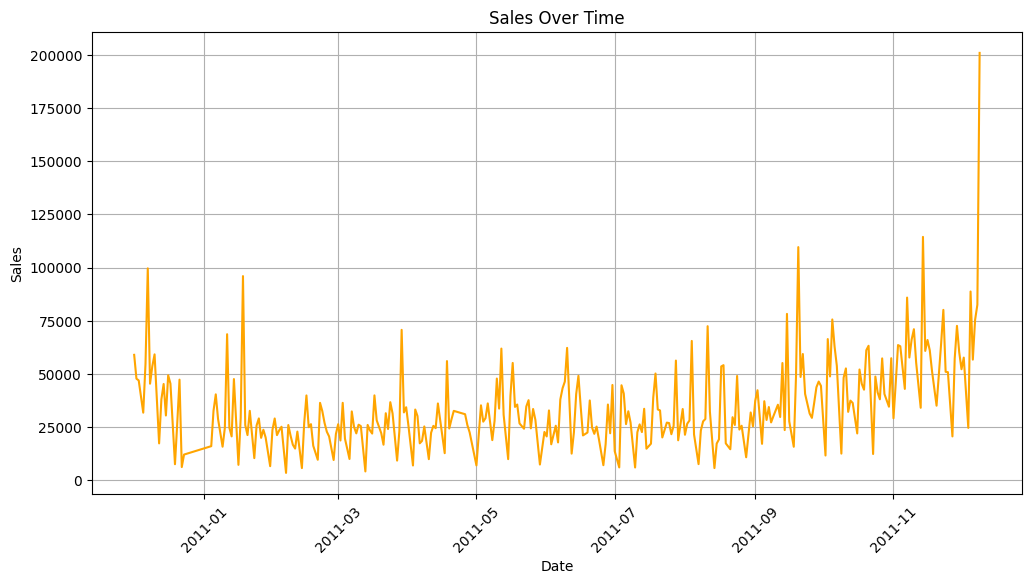

In [8]:
# Plot Sales over time
plt.figure(figsize=(12,6))
plt.plot(daily_sales['InvoiceDate'], daily_sales['Sales'], color='orange')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


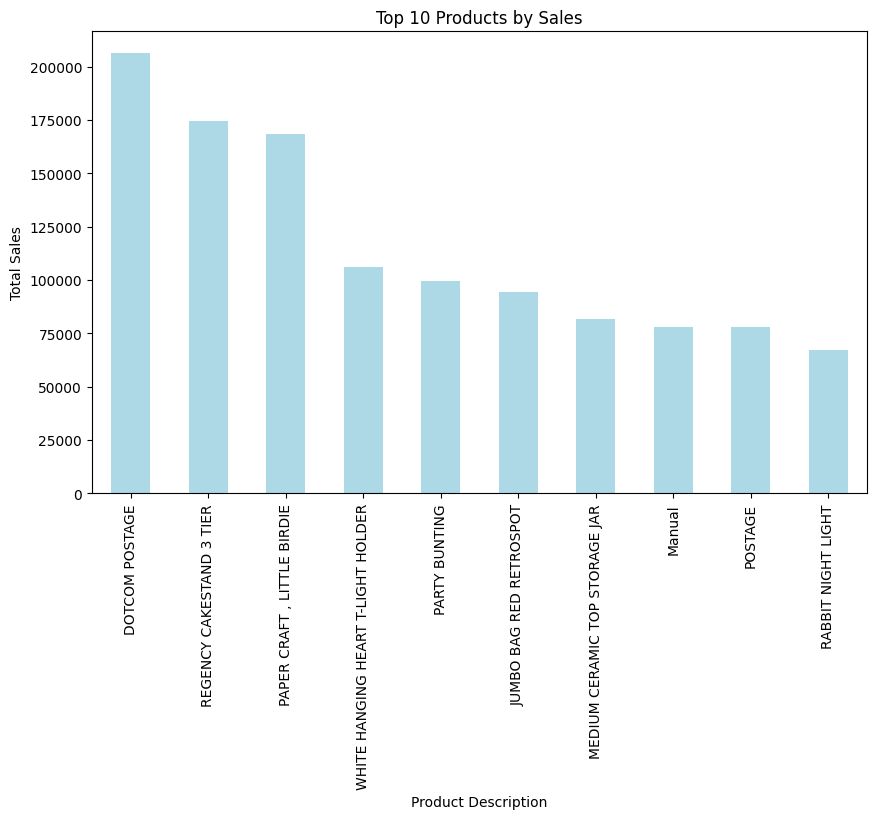

In [9]:
# Calculate total sales by product
top_products = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot top 10 products by sales
plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='lightblue')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Description')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


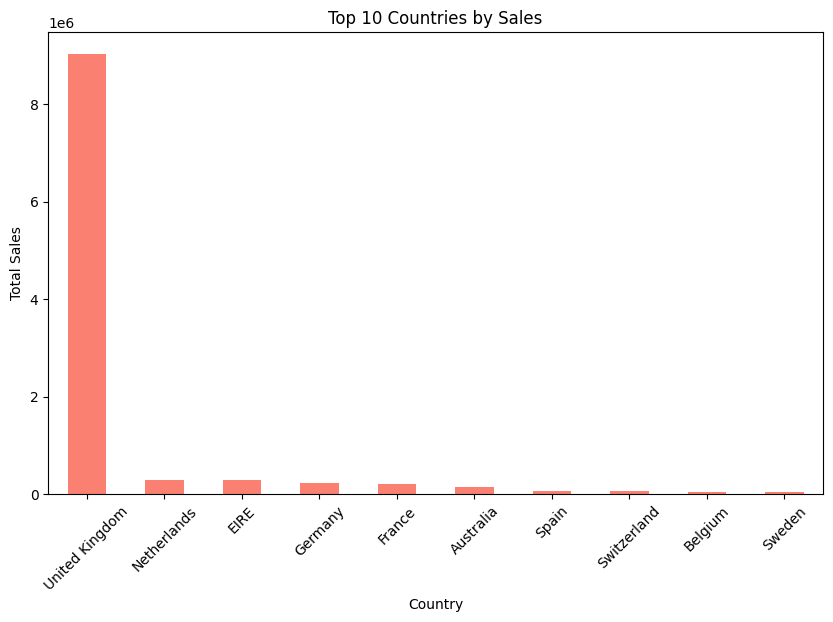

In [10]:
# Calculate total sales by country
top_countries = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot top 10 countries by sales
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='salmon')
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


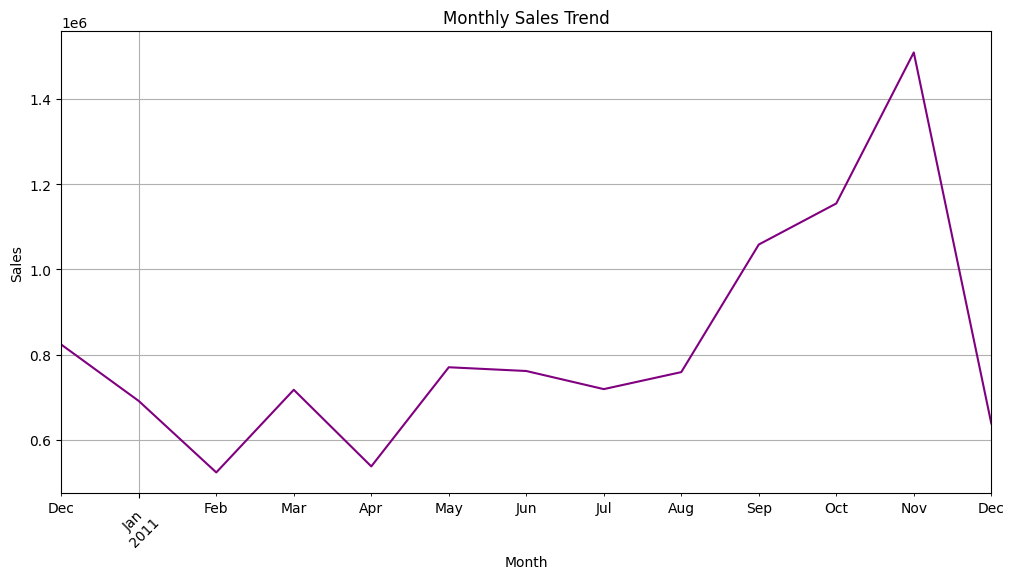

In [11]:
# Add a 'Month' column
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Aggregate sales by month
monthly_sales = df.groupby('Month')['Sales'].sum()

# Plot monthly sales trend
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

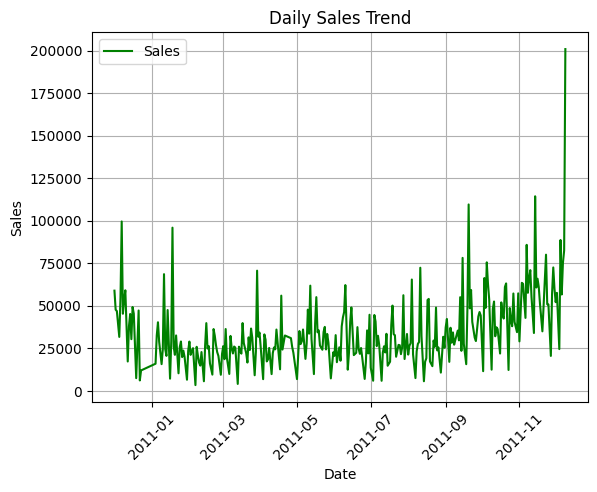

In [12]:
# Plot daily sales trend
plt.figure(figsize=(12,6))
daily_sales.plot(x='InvoiceDate', y='Sales', kind='line', color='green')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


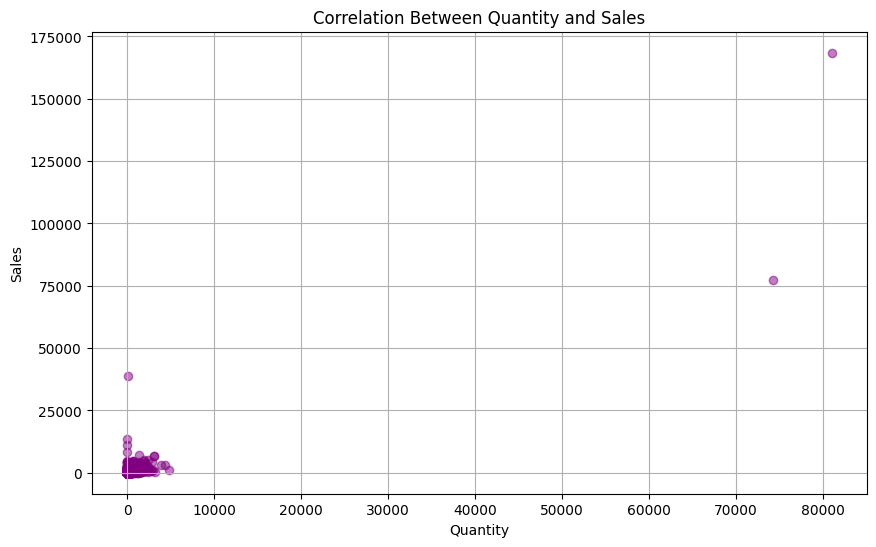

In [13]:
# Plot correlation between Quantity and Sales
plt.figure(figsize=(10,6))
plt.scatter(df['Quantity'], df['Sales'], color='purple', alpha=0.5)
plt.title('Correlation Between Quantity and Sales')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


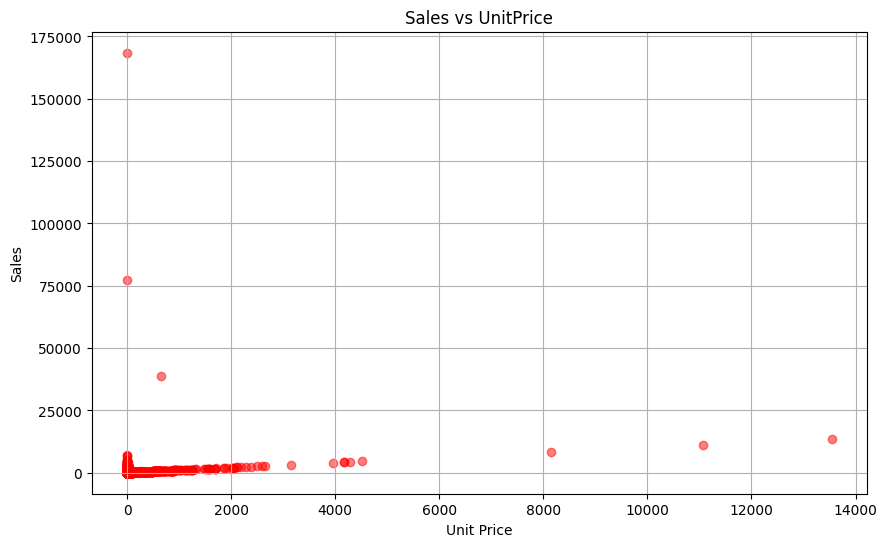

In [14]:
# Plot Sales vs UnitPrice
plt.figure(figsize=(10,6))
plt.scatter(df['UnitPrice'], df['Sales'], color='red', alpha=0.5)
plt.title('Sales vs UnitPrice')
plt.xlabel('Unit Price')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


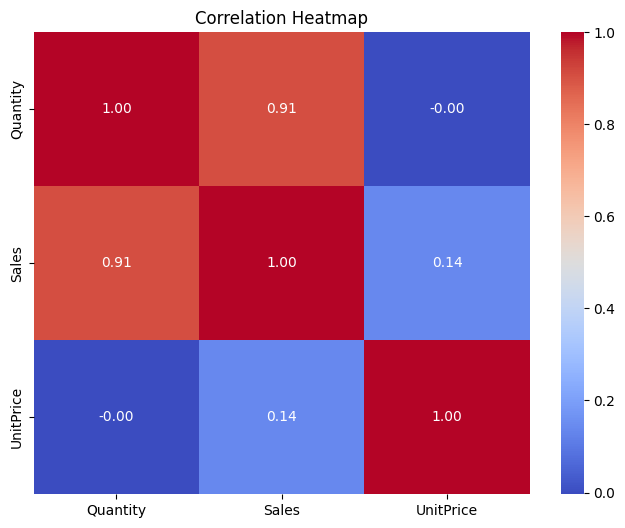

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for correlation matrix
numeric_cols = df[['Quantity', 'Sales', 'UnitPrice']]

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


Stationarity Check using the Augmented Dickey-Fuller (ADF) Test

In [16]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(daily_sales['Sales'])

# Display the results of the ADF test
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpretation of p-value
if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary and requires differencing.")


ADF Statistic: 0.031978762915474475
p-value: 0.9610981503217909
Critical Values: {'1%': np.float64(-3.452867117291862), '5%': np.float64(-2.8714554160827745), '10%': np.float64(-2.5720532321867466)}
The series is not stationary and requires differencing.


Differencing the Data

In [17]:
# Apply differencing to the sales data
daily_sales['Sales_diff'] = daily_sales['Sales'] - daily_sales['Sales'].shift(1)

# Drop the first NaN value caused by differencing
daily_sales.dropna(subset=['Sales_diff'], inplace=True)

# Perform the ADF test again on the differenced series
result_diff = adfuller(daily_sales['Sales_diff'])
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):', result_diff[4])

# Check if the differenced series is stationary
if result_diff[1] < 0.05:
    print("The differenced series is stationary.")
else:
    print("The differenced series is still not stationary.")


ADF Statistic (Differenced): -6.385461364989255
p-value (Differenced): 2.1698116587893395e-08
Critical Values (Differenced): {'1%': np.float64(-3.452867117291862), '5%': np.float64(-2.8714554160827745), '10%': np.float64(-2.5720532321867466)}
The differenced series is stationary.


ARIMA Model Fitting

c:\Users\Santo\Documents\Installed\Python_3_13\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Santo\Documents\Installed\Python_3_13\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Santo\Documents\Installed\Python_3_13\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Santo\Documents\Installed\Python_3_13\Lib\site-packages\statsmodels\tsa\b

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  304
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3401.182
Date:                Thu, 29 Jan 2026   AIC                           6808.365
Time:                        22:41:33   BIC                           6819.506
Sample:                             0   HQIC                          6812.822
                                - 304                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0663      0.084      0.787      0.431      -0.099       0.231
ma.L1         -0.9032      0.038    -23.983      0.000      -0.977      -0.829
sigma2      3.599e+08   1.58e-10   2.27e+18      0.0

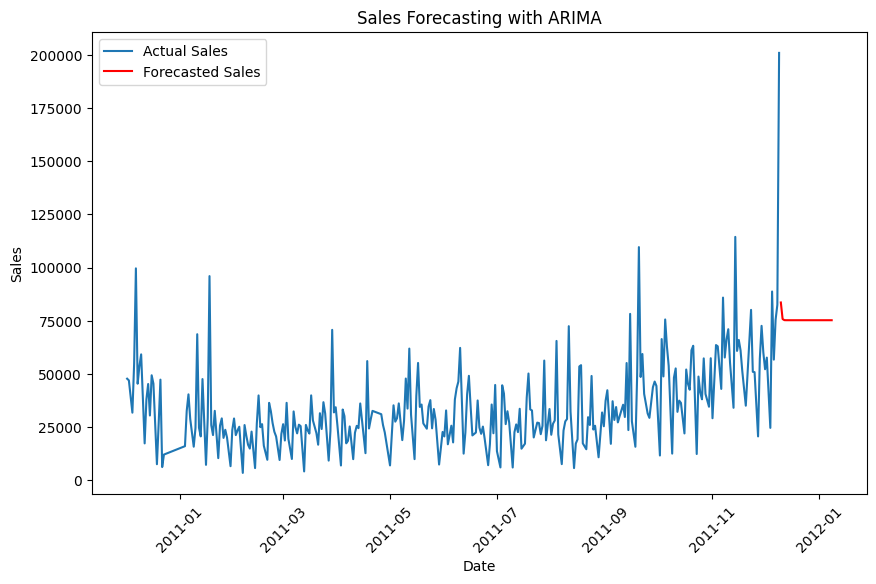

In [18]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model (p=1, d=1, q=1 as a starting point)
model = ARIMA(daily_sales['Sales'], order=(1, 1, 1))
model_fitted = model.fit()

# Print the summary of the model
print(model_fitted.summary())

# Plot the forecasted values
forecast = model_fitted.forecast(steps=30)  # Forecast the next 30 days
forecast_index = pd.date_range(start=daily_sales['InvoiceDate'].max() + pd.Timedelta(days=1), periods=30)

# Plot actual vs forecasted values
plt.figure(figsize=(10,6))
plt.plot(daily_sales['InvoiceDate'], daily_sales['Sales'], label='Actual Sales')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Get the fitted values (in-sample prediction)
fitted_values = model_fitted.fittedvalues

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(daily_sales['Sales'][1:], fitted_values[1:]))  # exclude the first NaN value
mae = mean_absolute_error(daily_sales['Sales'][1:], fitted_values[1:])

# Print the results
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 18126.4634333557
MAE: 11906.406097772044


c:\Users\Santo\Documents\Installed\Python_3_13\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Santo\Documents\Installed\Python_3_13\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


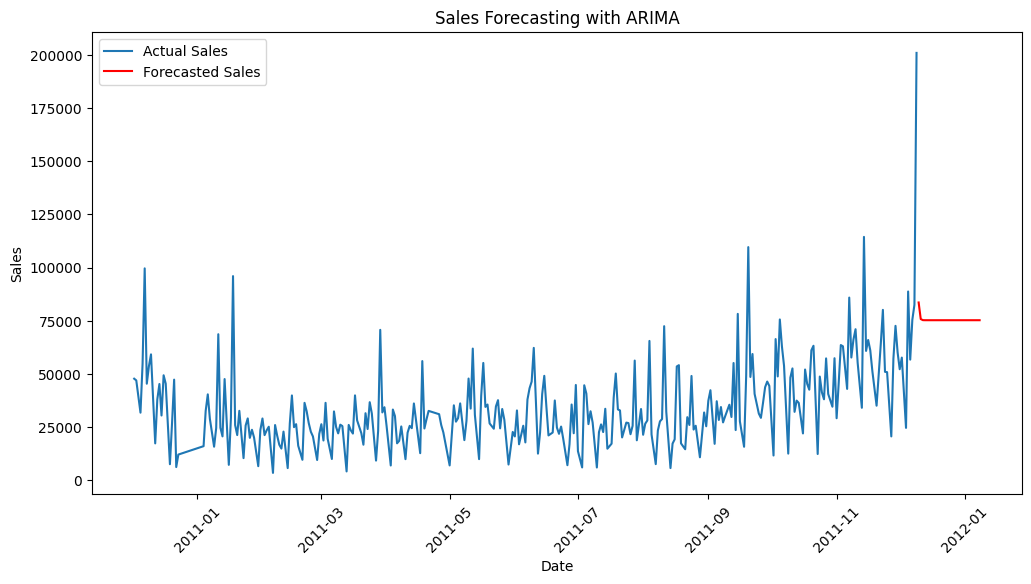

In [20]:
# Forecast for the next 30 days
forecast = model_fitted.forecast(steps=30)

# Create a date range for the forecast
forecast_index = pd.date_range(start=daily_sales['InvoiceDate'].max() + pd.Timedelta(days=1), periods=30)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['InvoiceDate'], daily_sales['Sales'], label='Actual Sales')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.show()
